# Task
This is an ML implementation  of emotion
It loads `chat_emotions' from the prepared data and performs the following tasks:

## Data loading

### Subtask:
Load the dataset "chat_emotions.csv" into a Pandas DataFrame.


**Reasoning**:
The instructions are to load the dataset into a pandas DataFrame and display the first 5 rows. These instructions can be combined into a single code block.



In [4]:
import pandas as pd

df = pd.read_csv("/data-preparation/chat_emotions.csv")
display(df.head())

,text,emotion
0,i cant do my kyc because nigerian banks are no...,sadness
1,you don t need to add bank account to complete...,neutral
2,verification will be automatic if you ve done ...,neutral
3,iam wait hour not complete kyc,sadness
4,it can take longer after working hour please s...,neutral


## Data exploration

### Subtask:
Explore the dataset to understand its characteristics and identify potential issues.


**TASK**:
 First, determine the shape of the DataFrame. Second, check the data types of each column. Third, calculate the distribution of emotion labels. Fourth, calculate the percentage distribution of emotion labels. Fifth, check for missing values. Sixth, calculate text length and add to a new column. Seventh, print text length statistics.



In [5]:

print("DataFrame shape:", df.shape)


print("\nData types:\n", df.dtypes)


emotion_counts = df['emotion'].value_counts()
print("\nEmotion label distribution:\n", emotion_counts)


emotion_percentage = df['emotion'].value_counts(normalize=True)
print("\nEmotion label percentage distribution:\n", emotion_percentage)

missing_values = df.isnull().sum()
print("\nMissing values:\n", missing_values)


df['text_length'] = df['text'].apply(lambda x: len(x))

print("\nText length statistics:\n", df['text_length'].describe())

DataFrame shape: (35596, 2)

Data types:
 text       object
emotion    object
dtype: object

Emotion label distribution:
 emotion
neutral     22506
sadness      5938
joy          3514
surprise     2691
anger         592
fear          311
disgust        43
Name: count, dtype: int64

Emotion label percentage distribution:
 emotion
neutral     0.632280
sadness     0.166821
joy         0.098722
surprise    0.075601
anger       0.016632
fear        0.008737
disgust     0.001208
Name: proportion, dtype: float64

Missing values:
 text       0
emotion    1
dtype: int64

Text length statistics:
 count    35596.000000
mean        79.745084
std         91.394310
min         11.000000
25%         32.000000
50%         49.000000
75%         87.000000
max       2413.000000
Name: text_length, dtype: float64


## Data cleaning

### Subtask:
Clean the dataset by handling missing values, removing duplicate rows, and addressing potential outliers in the text data.



The subtask is to clean the dataset. The instructions require checking for and removing duplicate rows, confirming the absence of missing values, identifying and removing outliers, and reporting the shape of the cleaned dataframe. I will group steps 1, 2, 3 and 4 into a single code block.



In [6]:

num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")
if num_duplicates > 0:
    df.drop_duplicates(inplace=True)
    print(f"Removed {num_duplicates} duplicate rows.")

if df.isnull().sum().sum() == 0:
    print("No missing values found.")


text_length_99th = df['text_length'].quantile(0.99)
text_length_1st = df['text_length'].quantile(0.01)
outliers = df[(df['text_length'] > text_length_99th) | (df['text_length'] < text_length_1st)]
num_outliers = len(outliers)
print(f"Number of outliers: {num_outliers}")
df = df[(df['text_length'] <= text_length_99th) & (df['text_length'] >= text_length_1st)]
print(f"Removed {num_outliers} outliers.")


print("Shape of dataframe after cleaning:", df.shape)

Number of duplicate rows: 5312
Removed 5312 duplicate rows.
Number of outliers: 551
Removed 551 outliers.
Shape of dataframe after cleaning: (29733, 3)


## Data wrangling

### Subtask:
Preprocess the text data and encode the emotion labels.



The next step is to preprocess the text data according to the instructions, which involves several steps such as converting to lowercase, removing punctuation, tokenization, removing stop words, stemming/lemmatization, and rejoining tokens. All these steps are related to text preprocessing and can be grouped into one code block. Additionally, label encoding can also be done in the same code block as it's a preprocessing step for the 'emotion' column.



In [7]:

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.preprocessing import LabelEncoder
import nltk


nltk.download('stopwords', quiet=True)


df['text'] = df['text'].str.lower()


def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

df['text'] = df['text'].apply(remove_punctuation)


stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    tokens = text.split()
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

df['text'] = df['text'].apply(preprocess_text)

# 7. Label Encoding
label_encoder = LabelEncoder()
df['emotion_encoded'] = label_encoder.fit_transform(df['emotion'])

## Data visualization

### Subtask:
Visualize the distribution of emotion labels and the most frequent words, and plot the distribution of the length of the preprocessed text.



The current subtask is to visualize the distribution of emotion labels, the most frequent words, and the distribution of the length of the preprocessed text. The instructions involve creating a bar chart for emotion label distribution, a word cloud for frequent words, and a histogram for text length distribution. All of these can be done in a single code block.



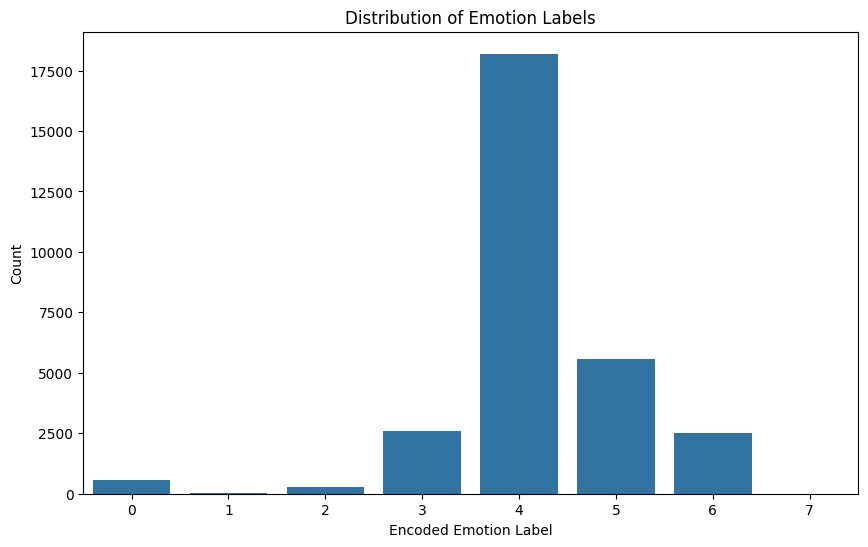

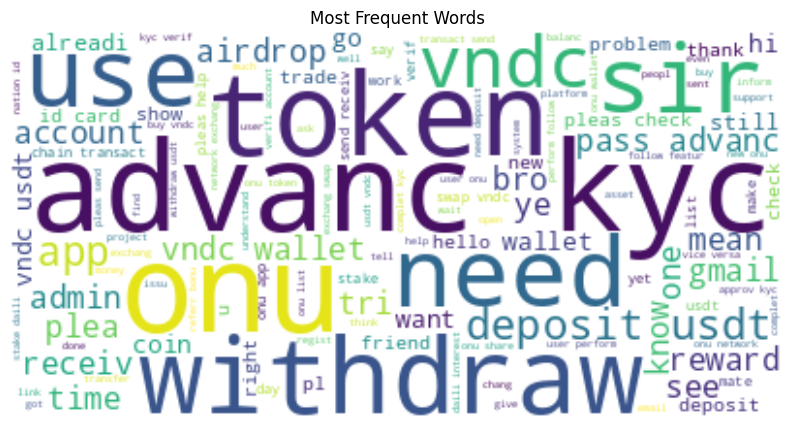

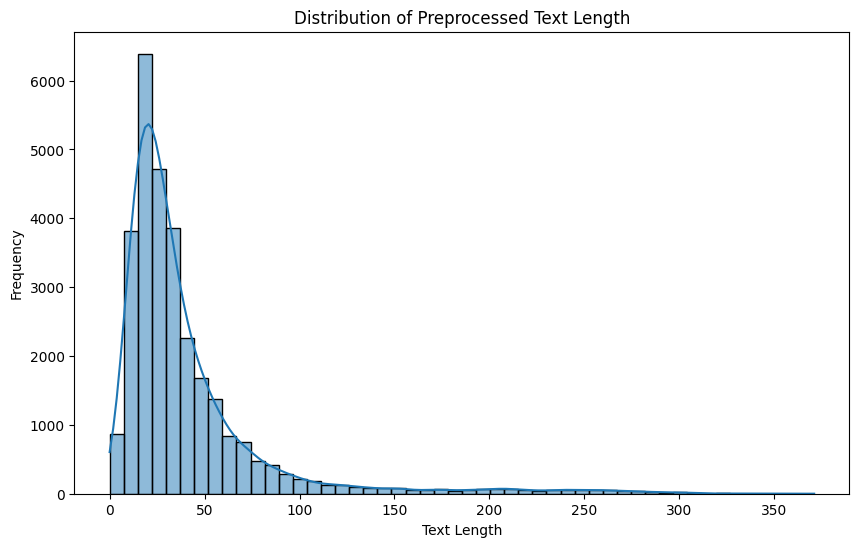

In [8]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.countplot(x='emotion_encoded', data=df)
plt.title('Distribution of Emotion Labels')
plt.xlabel('Encoded Emotion Label')
plt.ylabel('Count')
plt.show()


text = " ".join(text for text in df.text)
wordcloud = WordCloud(background_color='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most Frequent Words')
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(df['text'].apply(len), bins=50, kde=True)
plt.title('Distribution of Preprocessed Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

## Data preparation

### Subtask:
Prepare the text data for model training by converting it into a numerical format using TF-IDF.



The current subtask is to prepare the text data for model training using TF-IDF. This involves instantiating a `TfidfVectorizer`, fitting it to the 'text' column, transforming the text data, storing the TF-IDF matrix, extracting the target variable 'emotion_encoded', and printing the shapes of the TF-IDF matrix and the target variable. I will combine these steps into a single code block.



In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))


X_tfidf = tfidf_vectorizer.fit_transform(df['text'])


y = df['emotion_encoded']


print("Shape of X_tfidf:", X_tfidf.shape)
print("Shape of y:", y.shape)

Shape of X_tfidf: (29733, 5000)
Shape of y: (29733,)


## Data splitting

### Subtask:
Split the prepared data into training, validation, and testing sets.


The current subtask is to split the data into training, validation, and testing sets. This involves several steps: importing `train_test_split`, splitting the data into training and testing sets, splitting the training data into training and validation sets, and printing the shapes of the resulting sets. All these steps can be done in one code block.



In [10]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.3, random_state=42
)


X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.214, random_state=42
)


print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)

X_train shape: (16359, 5000)
X_val shape: (4454, 5000)
X_test shape: (8920, 5000)
y_train shape: (16359,)
y_val shape: (4454,)
y_test shape: (8920,)


## Model training

### Subtask:
Train multiple models for text classification using the prepared data.



The subtask is to train multiple models for text classification. This involves importing necessary libraries, instantiating models, and training them. Since the data is already split into training, validation, and testing sets, we can proceed with importing the required models and training them on the training data. We will instantiate `MultinomialNB`, `LogisticRegression`, and `SVC` models and then train each model using the `fit` method.



In [17]:


print(df['emotion'].value_counts())


emotion
neutral     18197
sadness      5580
joy          2579
surprise     2516
anger         557
fear          261
disgust        42
Name: count, dtype: int64


In [19]:

from imblearn.over_sampling import RandomOverSampler


oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

print(pd.Series(y_train_resampled).value_counts())


emotion_encoded
4    10075
5    10075
6    10075
3    10075
2    10075
0    10075
1    10075
7    10075
Name: count, dtype: int64


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


mnb_model = MultinomialNB()
lr_model = LogisticRegression(class_weight='balanced')
svc_model = SVC(class_weight='balanced')


mnb_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)
svc_model.fit(X_train, y_train)

## Model optimization

### Subtask:
Optimize the trained models by tuning their hyperparameters using GridSearchCV and evaluate their performance on the validation set.


**Reasoning**:
The current subtask is to optimize the trained models by tuning their hyperparameters using GridSearchCV and evaluate their performance. This involves importing `GridSearchCV`, defining parameter grids for each model, instantiating `GridSearchCV` objects, fitting them to the training data, printing the best parameters and scores, evaluating the best models on the validation set, and storing the best estimators. All these steps can be combined into one code block.



In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


param_grid_mnb = {'alpha': [0.1, 0.5, 1.0]}
param_grid_lr = {'C': [0.1, 1, 10], 'max_iter': [100, 200]}
param_grid_svc = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}


mnb_model = MultinomialNB()
lr_model = LogisticRegression(class_weight='balanced',)
svc_model = SVC(class_weight='balanced')


grid_search_mnb = GridSearchCV(mnb_model, param_grid_mnb, cv=3, n_jobs=-1)
grid_search_lr = GridSearchCV(lr_model, param_grid_lr, cv=3, n_jobs=-1)
grid_search_svc = GridSearchCV(svc_model, param_grid_svc, cv=3, n_jobs=-1)


grid_search_mnb.fit(X_train, y_train)
grid_search_lr.fit(X_train, y_train)
grid_search_svc.fit(X_train, y_train)

# Print best parameters and scores
print("MultinomialNB Best Parameters:", grid_search_mnb.best_params_)
print("MultinomialNB Best Cross-validation Score:", grid_search_mnb.best_score_)
print("LogisticRegression Best Parameters:", grid_search_lr.best_params_)
print("LogisticRegression Best Cross-validation Score:", grid_search_lr.best_score_)
print("SVC Best Parameters:", grid_search_svc.best_params_)
print("SVC Best Cross-validation Score:", grid_search_svc.best_score_)

# Evaluate on validation set
best_mnb = grid_search_mnb.best_estimator_
best_lr = grid_search_lr.best_estimator_
best_svc = grid_search_svc.best_estimator_

mnb_val_score = best_mnb.score(X_val, y_val)
lr_val_score = best_lr.score(X_val, y_val)
svc_val_score = best_svc.score(X_val, y_val)

print("MultinomialNB Validation Score:", mnb_val_score)
print("LogisticRegression Validation Score:", lr_val_score)
print("SVC Validation Score:", svc_val_score)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least popul

MultinomialNB Best Parameters: {'alpha': 0.5}
MultinomialNB Best Cross-validation Score: 0.697597652668256
LogisticRegression Best Parameters: {'C': 10, 'max_iter': 200}
LogisticRegression Best Cross-validation Score: 0.6028485848768262
SVC Best Parameters: {'C': 10, 'kernel': 'rbf'}
SVC Best Cross-validation Score: 0.6836603704382909
MultinomialNB Validation Score: 0.6933093848226314
LogisticRegression Validation Score: 0.5920520880107768
SVC Validation Score: 0.6778176919622811


## Model evaluation

### Subtask:
Evaluate the performance of the optimized models on the test set using appropriate metrics.


**Reasoning**:
I need to evaluate the performance of the optimized models on the test set. This involves predicting the emotion labels for the test set, calculating performance metrics (accuracy, precision, recall, F1-score), and printing the classification report and confusion matrix for each model. I will group all the steps from the instructions into a single code block to accomplish this task.



In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Predict on test set and evaluate for MultinomialNB
y_pred_mnb = best_mnb.predict(X_test)
mnb_accuracy = accuracy_score(y_test, y_pred_mnb)
mnb_precision = precision_score(y_test, y_pred_mnb, average='weighted')
mnb_recall = recall_score(y_test, y_pred_mnb, average='weighted')
mnb_f1 = f1_score(y_test, y_pred_mnb, average='weighted')
print("MultinomialNB Performance:")
print(f"  Accuracy: {mnb_accuracy:.4f}")
print(f"  Precision: {mnb_precision:.4f}")
print(f"  Recall: {mnb_recall:.4f}")
print(f"  F1-score: {mnb_f1:.4f}")
print("  Classification Report:\n", classification_report(y_test, y_pred_mnb))
print("  Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mnb))

# Predict on test set and evaluate for LogisticRegression
y_pred_lr = best_lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr, average='weighted')
lr_recall = recall_score(y_test, y_pred_lr, average='weighted')
lr_f1 = f1_score(y_test, y_pred_lr, average='weighted')
print("\nLogisticRegression Performance:")
print(f"  Accuracy: {lr_accuracy:.4f}")
print(f"  Precision: {lr_precision:.4f}")
print(f"  Recall: {lr_recall:.4f}")
print(f"  F1-score: {lr_f1:.4f}")
print("  Classification Report:\n", classification_report(y_test, y_pred_lr))
print("  Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

# Predict on test set and evaluate for SVC
y_pred_svc = best_svc.predict(X_test)
svc_accuracy = accuracy_score(y_test, y_pred_svc)
svc_precision = precision_score(y_test, y_pred_svc, average='weighted')
svc_recall = recall_score(y_test, y_pred_svc, average='weighted')
svc_f1 = f1_score(y_test, y_pred_svc, average='weighted')
print("\nSVC Performance:")
print(f"  Accuracy: {svc_accuracy:.4f}")
print(f"  Precision: {svc_precision:.4f}")
print(f"  Recall: {svc_recall:.4f}")
print(f"  F1-score: {svc_f1:.4f}")
print("  Classification Report:\n", classification_report(y_test, y_pred_svc))
print("  Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

MultinomialNB Performance:
  Accuracy: 0.6920
  Precision: 0.6792
  Recall: 0.6920
  F1-score: 0.6422
  Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.01      0.03       144
           1       0.00      0.00      0.00        12
           2       0.50      0.01      0.02        83
           3       0.69      0.47      0.56       768
           4       0.71      0.93      0.81      5390
           5       0.60      0.41      0.49      1727
           6       0.68      0.08      0.14       796

    accuracy                           0.69      8920
   macro avg       0.55      0.27      0.29      8920
weighted avg       0.68      0.69      0.64      8920

  Confusion Matrix:
 [[   2    0    0    3   95   43    1]
 [   0    0    0    1    8    3    0]
 [   0    0    1    3   66   13    0]
 [   0    0    0  363  356   43    6]
 [   1    0    1   97 5039  239   13]
 [   0    0    0   15  996  707    9]
 [   0    0    0   42  564

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

In [ ]:

import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

import nltk

from wordcloud import WordCloud

import joblib

models = {
    'MultinomialNB': (best_mnb, mnb_val_score),
    'LogisticRegression': (best_lr, lr_val_score),
    'SVC': (best_svc, svc_val_score)
}
best_model_name = max(models, key=lambda k: models[k][1])
best_model = models[best_model_name][0]

print(f"\nBest Model: {best_model_name}")



In [18]:

joblib.dump(best_model, 'best_model.pkl')

joblib.dump(label_encoder, 'label_encoder.pkl')

# Load the saved model and label encoder
loaded_model = joblib.load('best_model.pkl')
loaded_label_encoder = joblib.load('label_encoder.pkl')


example_texts = [
    "I am feeling very happy today!",
    "I'm so angry right now.",
    "I feel really sad.",
    "I'm so excited for the weekend",
    "This is neutral statement"
]


nltk.download('stopwords', quiet=True)
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = text.split()
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)


preprocessed_texts = [preprocess_text(text) for text in example_texts]


example_vectors = tfidf_vectorizer.transform(preprocessed_texts)


predictions = loaded_model.predict(example_vectors)


predicted_emotions = loaded_label_encoder.inverse_transform(predictions)


for text, emotion in zip(example_texts, predicted_emotions):
  print(f"Text: {text}")
  print(f"Predicted Emotion: {emotion}")
  print("-" * 20)



Best Model: MultinomialNB
Text: I am feeling very happy today!
Predicted Emotion: joy
--------------------
Text: I'm so angry right now.
Predicted Emotion: neutral
--------------------
Text: I feel really sad.
Predicted Emotion: sadness
--------------------
Text: I'm so excited for the weekend
Predicted Emotion: joy
--------------------
Text: This is neutral statement
Predicted Emotion: neutral
--------------------
